In [1]:
%reload_ext tensorboard

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
import re

In [7]:
from scipy.io.arff import loadarff

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
from sklearn import model_selection, svm

In [11]:
from sklearn.svm import SVR

In [12]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [13]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold, KFold, RandomizedSearchCV, train_test_split

In [14]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [15]:
import xgboost as xgb

In [16]:
import time

In [17]:
import tensorflow as tf

In [18]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [19]:
from tensorflow.keras.callbacks import TensorBoard

In [20]:
from tensorflow.keras import backend as K

In [21]:
from tensorflow.keras import optimizers

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPool1D

In [25]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
from skmultilearn.ensemble import RakelD

In [29]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [30]:
from sklearn.utils import class_weight

In [31]:
from skmultilearn.model_selection import iterative_train_test_split

In [32]:
from sklearn.metrics import multilabel_confusion_matrix,ConfusionMatrixDisplay, f1_score

In [33]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization

In [34]:
from sklearn import metrics

In [35]:
raw_data = loadarff('emotions.arff')

In [36]:
df = pd.DataFrame(raw_data[0]).astype(float)

In [37]:
df[0:100]

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0.0,1.0,1.0,0.0,0.0,0.0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1.0,0.0,0.0,0.0,0.0,1.0
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0.0,1.0,0.0,0.0,0.0,1.0
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0.0,0.0,1.0,0.0,0.0,0.0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.068296,0.175175,0.093400,-66.047116,5.295966,0.712742,0.659024,-0.099046,-0.237114,0.493464,...,2.0,0.073621,0.609145,0.831004,0.0,0.0,0.0,0.0,0.0,1.0
96,0.039252,0.071174,0.082229,-83.020945,8.019265,3.192298,0.943949,0.645530,0.878602,0.312472,...,2.0,0.318303,0.112681,0.819872,0.0,0.0,1.0,1.0,1.0,0.0
97,0.115189,0.414242,0.094059,-75.378674,1.606148,2.342139,1.812999,1.051490,1.438829,0.667829,...,2.0,1.578030,1.750715,3.328744,1.0,0.0,0.0,0.0,0.0,1.0
98,0.038503,0.118093,0.095043,-72.735390,3.794645,0.563289,2.163561,0.534350,1.273385,0.558633,...,3.0,0.189689,0.005646,0.214782,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mean_Acc1298_Mean_Mem40_Centroid  593 non-null    float64
 1   Mean_Acc1298_Mean_Mem40_Rolloff   593 non-null    float64
 2   Mean_Acc1298_Mean_Mem40_Flux      593 non-null    float64
 3   Mean_Acc1298_Mean_Mem40_MFCC_0    593 non-null    float64
 4   Mean_Acc1298_Mean_Mem40_MFCC_1    593 non-null    float64
 5   Mean_Acc1298_Mean_Mem40_MFCC_2    593 non-null    float64
 6   Mean_Acc1298_Mean_Mem40_MFCC_3    593 non-null    float64
 7   Mean_Acc1298_Mean_Mem40_MFCC_4    593 non-null    float64
 8   Mean_Acc1298_Mean_Mem40_MFCC_5    593 non-null    float64
 9   Mean_Acc1298_Mean_Mem40_MFCC_6    593 non-null    float64
 10  Mean_Acc1298_Mean_Mem40_MFCC_7    593 non-null    float64
 11  Mean_Acc1298_Mean_Mem40_MFCC_8    593 non-null    float64
 12  Mean_Acc

In [39]:
df.describe()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,2.099494,0.412940,0.354901,0.959906,0.291737,0.279933,0.445194,0.249578,0.283305,0.318718
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.316040,0.339559,0.362262,0.651827,0.454946,0.449345,0.497407,0.433134,0.450984,0.466373
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,2.000000,0.179411,0.099424,0.513974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,2.000000,0.309902,0.246193,0.804229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,2.000000,0.529859,0.472593,1.242089,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,3.000000,1.795128,1.797765,3.422899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still', 'sad-lonely', 'angry-aggresive']

In [41]:
feats_df = df.drop(columns = labels)

In [42]:
labels_df = df[labels]

In [43]:
label_d = {'amazed-suprised' : 0, 'happy-pleased': 0, 'relaxing-calm' : 0, 'quiet-still' : 0, 'sad-lonely': 0, 'angry-aggresive' : 0}

In [44]:
for col in labels_df.columns:
    label_d[col] += len(labels_df[labels_df[col] == 1])

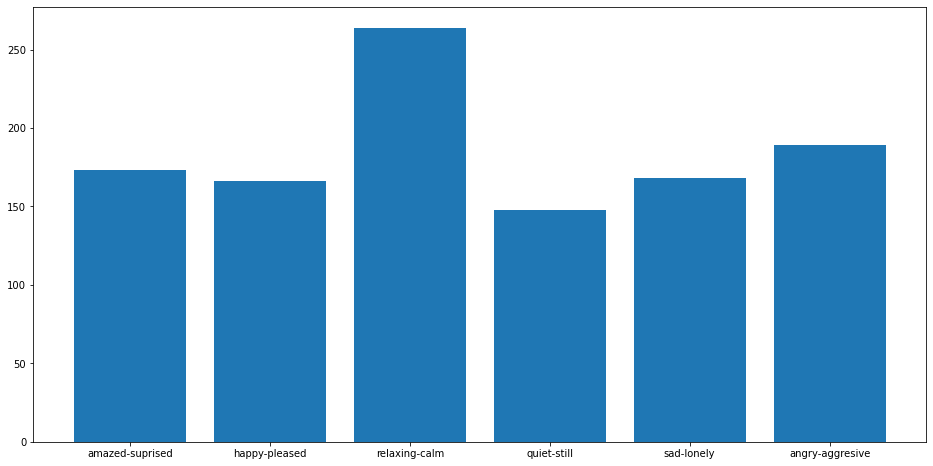

In [45]:
plt.figure(figsize = (16,8))
plt.bar(range(len(label_d)), list(label_d.values()), align='center')
plt.xticks(range(len(label_d)), list(label_d.keys()))
plt.show()

In [46]:
def transform_multiclass(orig_df):
    df = orig_df.copy()
    classe = []
    for i in range(len(df)):
        classe.append('')
    
    for i in range(len(df)):
        if df['amazed-suprised'][i] == 1:
            classe[i] = classe[i] + 'surprised-'
        if df['happy-pleased'][i] == 1:
            classe[i] = classe[i] + 'happy-'
        if df['relaxing-calm'][i] == 1:
            classe[i] = classe[i] + 'relaxing-'
        if df['quiet-still'][i] == 1:
            classe[i] = classe[i] + 'still-'
        if df['sad-lonely'][i] == 1:
            classe[i] = classe[i] + 'lonely-'
        if df['angry-aggresive'][i] == 1:
            classe[i] = classe[i] + 'angry-'
            
    df['Class'] = classe
    df.drop(['angry-aggresive','amazed-suprised','happy-pleased','relaxing-calm','quiet-still','sad-lonely'],axis=1,inplace = True)
    return df

In [47]:
class_label_df = transform_multiclass(labels_df)
class_label_df['Class'].unique()

array(['happy-relaxing-', 'surprised-angry-', 'happy-angry-', 'relaxing-',
       'still-', 'surprised-happy-', 'angry-', 'relaxing-still-lonely-',
       'surprised-', 'relaxing-lonely-', 'lonely-', 'lonely-angry-',
       'happy-', 'relaxing-angry-', 'surprised-happy-angry-',
       'relaxing-still-', 'surprised-lonely-', 'relaxing-lonely-angry-',
       'happy-lonely-', 'surprised-happy-relaxing-',
       'surprised-relaxing-', 'happy-relaxing-still-', 'still-lonely-',
       'happy-still-', 'relaxing-still-angry-', 'still-lonely-angry-',
       'surprised-lonely-angry-'], dtype=object)

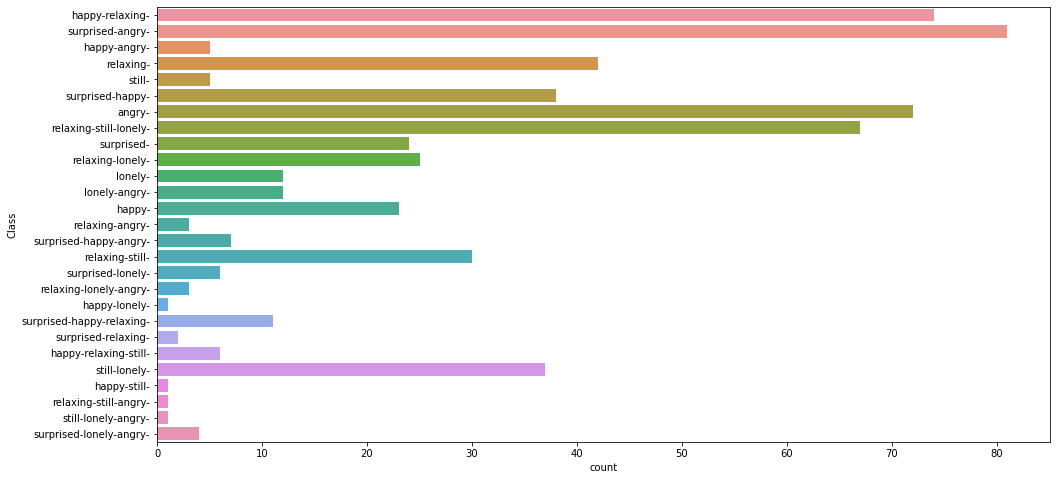

surprised-angry-             81
happy-relaxing-              74
angry-                       72
relaxing-still-lonely-       67
relaxing-                    42
surprised-happy-             38
still-lonely-                37
relaxing-still-              30
relaxing-lonely-             25
surprised-                   24
happy-                       23
lonely-angry-                12
lonely-                      12
surprised-happy-relaxing-    11
surprised-happy-angry-        7
surprised-lonely-             6
happy-relaxing-still-         6
still-                        5
happy-angry-                  5
surprised-lonely-angry-       4
relaxing-lonely-angry-        3
relaxing-angry-               3
surprised-relaxing-           2
relaxing-still-angry-         1
happy-lonely-                 1
happy-still-                  1
still-lonely-angry-           1
Name: Class, dtype: int64

In [48]:
plt.figure(figsize = (16,8))
sns.countplot(y = class_label_df.Class)
plt.show()
class_label_df.Class.value_counts()

In [49]:
df.corr().style.background_gradient(cmap='coolwarm')

In [50]:
df.duplicated().unique()

array([False])

In [51]:
df.isnull().sum().unique()

array([0], dtype=int64)

In [52]:
corr_matrix = feats_df.corr().abs()

In [53]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-53-c1ad37c011f5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [54]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [55]:
df.drop(df[to_drop], axis=1,inplace = True)

In [56]:
df['Class'] = class_label_df['Class']
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_LowPeakBPM,BH_HighPeakBPM,BH_HighLowRatio,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive,Class
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,68.0,136.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,happy-relaxing-
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,70.0,140.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,surprised-angry-
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,61.0,183.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,happy-angry-
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,66.0,132.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,relaxing-
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,100.0,200.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,still-


In [57]:
class_df = df.drop(labels,1)
print(class_df.shape)
class_df.head()

(593, 54)


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_6,Std_Acc1298_Std_Mem40_MFCC_7,Std_Acc1298_Std_Mem40_MFCC_8,Std_Acc1298_Std_Mem40_MFCC_9,Std_Acc1298_Std_Mem40_MFCC_10,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakBPM,BH_HighLowRatio,Class
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.168246,0.115849,0.136020,0.110514,0.100517,0.051035,68.0,136.0,2.0,happy-relaxing-
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.057991,0.059393,0.059457,0.053439,0.067684,0.295031,70.0,140.0,2.0,surprised-angry-
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.139323,0.109279,0.090650,0.117886,0.100852,0.161574,61.0,183.0,3.0,happy-angry-
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.124399,0.155513,0.167114,0.113774,0.112815,0.043012,66.0,132.0,2.0,relaxing-
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.142092,0.222804,0.329188,0.251668,0.265049,0.029308,100.0,200.0,2.0,still-


In [58]:
classes = class_label_df.Class.value_counts().index

In [59]:
class_series =class_label_df['Class'].value_counts()

In [60]:
outliers = []
for label in classes:
    if class_series[label] < 5:
        outliers.append(label)
outliers

['surprised-lonely-angry-',
 'relaxing-lonely-angry-',
 'relaxing-angry-',
 'surprised-relaxing-',
 'relaxing-still-angry-',
 'happy-lonely-',
 'happy-still-',
 'still-lonely-angry-']

In [61]:
for outlier in outliers:
    class_df = class_df[class_df['Class'] != outlier]

print(class_df.shape)

(577, 54)


In [62]:
X = class_df.drop('Class',1)

In [63]:
y = class_df['Class']

In [64]:
print(X.shape, y.shape)

(577, 53) (577,)


In [65]:
ros = RandomOverSampler()

In [66]:
X_over, y_over = ros.fit_resample(X, y)

In [67]:
print(X_over.shape)
print(y_over.shape)

(1539, 53)
(1539,)


In [68]:
y_over.value_counts()

happy-relaxing-still-        81
surprised-happy-angry-       81
angry-                       81
happy-angry-                 81
relaxing-still-lonely-       81
happy-                       81
lonely-angry-                81
surprised-happy-             81
surprised-angry-             81
relaxing-still-              81
surprised-                   81
happy-relaxing-              81
relaxing-                    81
surprised-happy-relaxing-    81
relaxing-lonely-             81
lonely-                      81
surprised-lonely-            81
still-                       81
still-lonely-                81
Name: Class, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.2, random_state = 42)

In [70]:
train_df = X_train.join(y_train)

In [71]:
test_df = X_test.join(y_test)

In [72]:
test_df.shape

(308, 54)

In [73]:
test_df.duplicated().sum()

103

In [74]:
test_df.drop_duplicates(inplace = True)
test_df.shape

(205, 54)

In [75]:
train_df.shape

(1231, 54)

In [76]:
le = LabelEncoder()

In [77]:
X_train = train_df.drop('Class',1).values

In [78]:
X_train = preprocessing.scale(X_train)

In [79]:
y_train = le.fit_transform(train_df['Class'])

In [80]:
X_test = test_df.drop('Class',1).values

In [81]:
X_test = preprocessing.scale(X_test)

In [82]:
y_test = le.fit_transform(test_df['Class'])

In [83]:
X_train

array([[ 0.0241392 ,  0.72571669,  0.85444422, ...,  1.55304551,
         1.20260439, -0.35483951],
       [-1.35857194,  3.37930574,  0.90084181, ..., -0.06660843,
        -0.34126091, -0.35483951],
       [ 0.56690691, -0.33209589, -0.25578389, ..., -0.40403634,
        -0.66289951, -0.35483951],
       ...,
       [-1.18954247, -1.27972005, -1.06944617, ...,  1.35058877,
         1.00962122, -0.35483951],
       [ 3.30559412,  1.74565199, -0.30028771, ..., -0.8764354 ,
        -1.11319356, -0.35483951],
       [-0.18034189, -0.693923  ,  0.09674312, ..., -0.74146424,
        -0.98453812, -0.35483951]])

In [84]:
classifier = RandomForestClassifier(n_estimators = 100,n_jobs = -1, verbose = 0, random_state = 30)

In [85]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=30)

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [88]:
f1 = round(f1_score(y_test,y_pred, average = 'micro'),2)

In [89]:
accuracy = round(accuracy_score(y_test,y_pred),2)

In [90]:
print(f'Accuracy: {accuracy*100}%\n')
print(f'F1 Score: {f1*100}%\n')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 81.0%

F1 Score: 81.0%

Confusion Matrix:
[[ 9  0  0  2  0  0  0  0  0  0  0  1  0  0  5  0  0  0  0]
 [ 1 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  6  0  0  0  2  0  0  2  0  0  1  0  3  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0 11  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 11  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 14  0  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0 10  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  7  1  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  1  1  

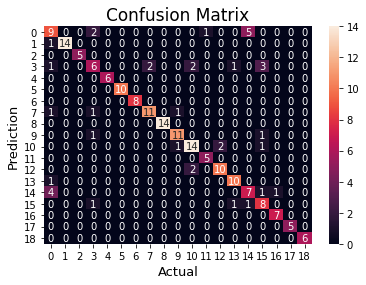

In [91]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [92]:
classifier = OneVsRestClassifier(xgb.XGBClassifier(n_jobs = -1))

In [93]:
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [94]:
y_pred = classifier.predict(X_test)

In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [96]:
f1 = round(f1_score(y_test,y_pred, average = 'micro'),3)

In [97]:
accuracy = round(accuracy_score(y_test,y_pred),3)

In [98]:
print(f'Accuracy: {accuracy*100}%\n')
print(f'F1 Score: {f1*100}%\n')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 75.6%

F1 Score: 75.6%

Confusion Matrix:
[[ 8  0  0  5  0  0  0  0  0  0  1  0  0  2  1  0  0  0  0]
 [ 0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  4  0  0  0  1  1  0  2  0  0  0  1  5  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0 10  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 11  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  0  1  0  1 10  1  3  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  1  0  0  0  0]
 [ 5  0  0  1  0  0  0  0  0  0  0  0  0  0  6  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  1  1  

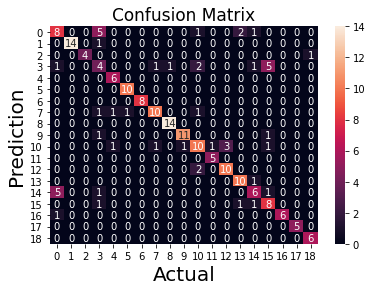

In [99]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
           )
plt.ylabel('Prediction',fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [100]:
BATCH_SIZE = 64
EPOCHS = 100
dense_layers = [1]
conv_layers = [2]
layer_sizes = [128]

In [101]:
X_train_n = X_train
y_train_n = y_train
X_test_n = X_test
y_test_n = y_test

In [102]:
X_train_n = preprocessing.scale(X_train_n)
X_test_n = preprocessing.scale(X_test_n)

In [103]:
X_train_n = np.reshape(X_train_n, (X_train_n.shape[0], X_train_n.shape[1] , 1))

In [104]:
X_test_n = np.reshape(X_test_n, (X_test_n.shape[0], X_test_n.shape[1], 1))

In [105]:
sw = class_weight.compute_sample_weight('balanced', y_train_n)

In [106]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f'emotions_cnn-dense-{dense_layer}-layer{layer_size}-conv{conv_layer}-time-{int(time.time())}'
            tb_callback = TensorBoard(log_dir = f'logs/{NAME}')
            
            model2 = Sequential()
            
            if conv_layer > 0:
                model2.add(Conv1D(layer_size, 3,padding='valid', input_shape=(53,1),activation='tanh'))
                model2.add(BatchNormalization())
                model2.add(MaxPooling1D(pool_size=(4)))
                model2.add(Dropout(0.2)) 
                
                for l in range(conv_layer - 1):
                    model2.add(Conv1D(layer_size, 3,padding='valid',activation='tanh'))
                    model2.add(BatchNormalization())
                    model2.add(MaxPooling1D(pool_size=(2)))
                    model2.add(Dropout(0.2)) 
            
                                   
            else:
                model2.add(Flatten())
                model2.add(Dense(layer_size, input_shape = (53,) ,activation='tanh'))
            
            model2.add(Dropout(0.2))  
            model2.add(Flatten())
            for l in range(dense_layer):
                model2.add(Dense(layer_size, activation='relu'))
                model2.add(BatchNormalization())
                model2.add(Dropout(0.1))
                
            model2.add(Dropout(0.3))
            model2.add(Dense(20, activation="softmax"))

            model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            history = model2.fit(X_train_n, y_train_n, 
                                 batch_size=BATCH_SIZE, 
                                 epochs=EPOCHS,
                                 verbose= 0,
                                 validation_data=(X_test_n, y_test_n),
                                 )

In [107]:
score = model2.evaluate(X_test_n, y_test_n, verbose=1)

7/7 [==============================] - 0s 4ms/step - loss: 1.0953 - accuracy: 0.7805


In [108]:
print(f'Loss: {score[0]}\nAccuracy: { round(score[1], 2)*100}%')
y_pred = np.argmax(model2.predict(X_test_n), axis = 1)

Loss: 1.0952836275100708
Accuracy: 78.0%


In [109]:
cm = metrics.confusion_matrix(y_test_n, y_pred)
f1_score1 = round(f1_score(y_test_n,y_pred,average='micro'),3)

In [110]:
print(f'F1 Score: {f1_score1*100}%\n')
print(f'Confusion Matrix:\n{cm}')

F1 Score: 78.0%

Confusion Matrix:
[[ 7  1  0  3  0  0  1  0  0  0  0  1  0  0  4  0  0  0  0]
 [ 0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  6  0  0  0  2  0  0  0  0  1  0  0  4  0  0  1]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 13  0  3  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 11  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  0  0  0]
 [ 3  0  0  0  0  1  0  1  0  0  0  0  0  0  5  2  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  9  0  0  0]
 [ 0 

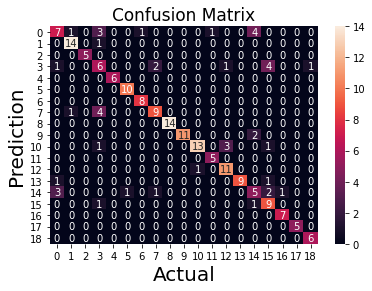

In [111]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
           )
plt.ylabel('Prediction',fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

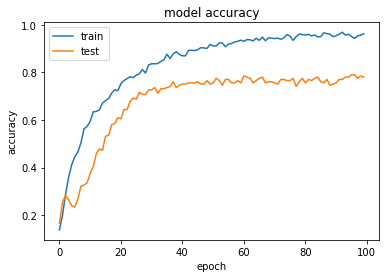

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

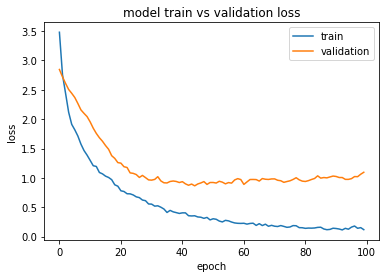

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()